# Анализ рынка компьютерных игр

## Описание проекта


   Данный проект является анализом данных вымышленного интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, _Xbox_ или _PlayStation_ ). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
   
   
   Представлены данные до 2016 года по которым планируется кампания на 2017-й. Требуется отработать принцип работы с данными.
   
   Входные данные состоят из одного датафрейма, в котором в столбцах которого содержится следующая информация:
   - _Name_ — название игры
   - _Platform_ — платформа
   - _Year_of_Release_ — год выпуска
   - _Genre_ — жанр игры
   - _NA_sales_ — продажи в Северной Америке (миллионы долларов)
   - _EU_sales_ — продажи в Европе (миллионы долларов)
   - _JP_sales_ — продажи в Японии (миллионы долларов)
   - _Other_sales_ — продажи в других странах (миллионы долларов)
   - _Сritic_Score_ — оценка критиков (максимум 100)
   - _User_Score_ — оценка пользователей (максимум 10)
   - _Rating_ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
   
   
### План выполнения проекта:
#### Шаг 1. Ознакомление с данными и изучение общей информации

Просмотрю общую информацию, определю количество пропусков и, возможно, заранее решу, как я буду исправлять проблемы в данных.

#### Шаг 2. Предобработка данных

На данном шаге я проведу следующие действия:
- Заменю названия столбцов (приведу к нижнему регистру);
- Преобразую данные в нужные типы;
- Обработаю пропуски при необходимости
- В отдельный столбец запишу суммарные продажи во всех регионах

#### Шаг 3. Исследовательский анализ данных

Самый крупный шаг по объему. Здесь я хочу узнать следующую информацию:
- Cколько игр выпускалось в разные годы
- Посмотрю, как менялись продажи по платформам.
- Определюсь  с актуальным периодом, за который и буду далее рассматривать следующие вопросы
- Узнаю какие платформы лидируют по продажам, растут или падают
- Ознакомлюсь с глобальными продажами каждой игры и разбивкой по платформам
- Посмотрю как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы.
- Просмотрю на общее распределение игр по жанрам

#### Шаг 4. Составление портрета пользователя каждого региона

Определю для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Шаг 5. Проверка гипотез

Здесь я проверю 2 следующие гипотезы:
 - Средние пользовательские рейтинги платформ _Xbox One_ и _PC_ одинаковые;
 - Средние пользовательские рейтинги жанров _Action_ и _Sports_ разные.

## Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
#Импортирую модуль SeaBorn для красивой визуализации
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors
df = pd.read_csv('C:\Datasets/games.csv')
#Посмотрю общую информацию о датафрейме. Конкретна интересует его размер и количество пропущенных значений
df.info()
#Выведу датафрейм
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Просмотрю по  столбцы с пропущенными значениями. Начну со столбца наименований в котором пропущено всего 2 значения

In [2]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Слишком мало информации. Проще всего будет просто удалить данные строки. Одновременно с этим избавимся и от пропусков в столбце Genre.

По всей видимости, эти данные были утеряны

Далее пропущенные значения года релиза игр

In [3]:
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Сначала подумал, что пропущенные значения можно будет заполнить годом из названия. Но, просмотрев большее количество строк понял, что это не сработает далеко не для всех случаев, а для тех что сработает, заполнится неправильно.
Причину возникновения этих пропусков не могу понять.

In [4]:
#Проверю какую-нибудь популярную игру, вышедшую на многих плтформах
df[df['Name'] == "Call of Duty: Black Ops"]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M
1412,Call of Duty: Black Ops,Wii,2010.0,Shooter,0.80,0.45,0.00,0.12,80.0,5.8,M
3439,Call of Duty: Black Ops,DS,2010.0,Shooter,0.50,0.04,0.00,0.04,74.0,6,T


Большинство игр продаются на разных платформах одновременно и одна и та же игра может появится в датафрейме несколько   раз.Это нельзя считать дубликатом.

Для подобных случаев можно искать пропущенные значения в строках для той же игры, но для другой платформы.

Этот способ сработает для большинства пропущенных значений. Что делать с остальными пока неясно

Так же надо будет поменять тип данных на целочисленный

Далее идут два столбца оценок критиков и пользователей в которых огромное количество пропущенных значений(около 50%)

In [5]:
df[df['Critic_Score'].isna()].head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [6]:
df[df['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Безумное количество пропусков. И это не самое страшное. Самое страшное это то, что я не понимаю что с этим делать(

Есть 2 варианта: 
- Обработать их аналогично году релиза. То есть добавить пропущенные значения для игры по значениям для другой платформы.
- Оставить как есть.

Также в столбце User_Score присутствуют значения tbd(to be determined). Очевидно, что такие данные должны были добавиться позже.

Пропуски можно объяснить тем, что рейтинги либо не подсчитывались, либо потерялись.

In [7]:
#df['User_Score'].astype('float')
print(len(df[df['User_Score'] == 'tbd']))
df[df['User_Score'] == 'tbd']
df[df['Name'] == 'Zumba Fitness']

2424


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
669,Zumba Fitness,X360,2010.0,Sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,Zumba Fitness,PS3,2010.0,Sports,0.28,0.21,0.0,0.08,NaN,3.8,E


Последний столбец с рейтингом ЕSRB

In [8]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [9]:
#Посмотрю на числовые характеристики
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В данном столбце пропуски можно было бы заполнить типичными оценками для жанра, но это куча монотонной работы. Пoэтому пропущенные значения оставлю как есть. 

Здесь явно выделяются 4 оценки по которым следует рассматривать зависимости в дальнейшей работе

# Вывод

В данном датафрейме 16715 строк. В  столбцах присутствуют пропущенные значения, где-то совсем мало, где-то больше половины. К моему разочарованию, не получится достаточно достоверно заполнить большую часть пропущенных значений и зачастую, пропуски придётся отсавлять как есть.

Часть столбцов имеют неправильный тип данных. 

Исправлю все ошибки на следующем шаге

## Шаг 2. Предобработка данных

In [10]:
#Импортирую модуль Math который мне понадобится для окргуления далее
import math

Начну с самого простого


Переведу названия столбцов в нижний регистр

In [11]:
df.columns = df.columns.str.lower()

Далее удалю игры без названия

In [12]:
df.dropna(subset = ['name'], inplace = True)

Пропущенные значения в годе релиза я заполню годом релиза той же игры, но на других платформах

In [13]:
df[df['name'] == 'Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [14]:
def year_import_from_other_platforms(row):
    '''
    Данная функция возвращает пропущенное значения года выпуска игры в случае, когда у таковой есть аналоги на других платформах
    '''
    Name = row['name']
    #Найду год выпуска на других платформах
    max_value = df[df['name'] == Name]['year_of_release'].max()
    #Заполню пропуск
    row['year_of_release'] = max_value
    return row

#По возможности заполню пропуски в годе выпуска с помощью написанной функции
df[df['year_of_release'].isna()] = df[df['year_of_release'].isna()].apply(year_import_from_other_platforms, axis = 1)
df[df['name'] == 'Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,2002.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Получилось заполнить половину пропущенных значений. Но появились 10 значений, которых не может быть. То есть алгоритм был такой


Если есть пропуск в столбце года релиза, то функция должна вытаскивать строку с пропущенным значением. Из этой строки брать название игры, по нему искать все совпадения в датафрейме(то есть ту же игру, но на другой платформе). Брать среднее по году по всем совпадениям и возвращать это среднее. Это сработало бы идеально если бы не 2 но:


1. Здесь присутствуют эксклюзивы для одной платформы. То есть невозможно найти год выпуска по другим платформам для одной и той же игры.
2. Здесь есть ремастеры и ремейки. То есть одна и та  же игра перевыпускалась и переделывалась несколько раз, поэтому среди всех совпадений год выпуска различается, что означает то, что мы не вернем то, что хотим.


Спустя некоторое время решил, что для игры с различным годом выпуска на разных платформах буду на место пропущенного значения возвращать последний год выпуска

In [15]:
#Посмотрю, как продвигается
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Остальные строки с пропущенными значениями в данном столбце удалю и назначу целочисленный тип данных

In [16]:
df.dropna(subset = ['year_of_release'], inplace = True)
df['year_of_release'] = df['year_of_release'].astype('int')

Можно было бы вытащить год релиза из названия в случаях, когда они присутствуют. Но я сразу отказался от этой затеи, так как год в названии не всегда соответствует году выпуска. Спортивные симуляторы почти всегда ставят год в названии, но выпускают загодя. Поэтому дата релиза может быть 2013, а название игры - "SportGame 2014". Помимо этого, никаких идей нет(

In [17]:
df.info()
#Посмотрю, как выглядят строки с ещё не добавленной оценкой пользователей
df[df['user_score'] == 'tbd']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Изначально я хотел поступить с оценками критиков и пользователей также, как и с годом релиза. Но тщательно поразмыслив и поспрашивая друзей-"знатоков" пришёл к выводу, что такое заполнение пропусков будет неправильным. Оценка одной игры на разных платформах может очень сильно различаться. На это влияет много факторов: дата релиза, количество игроков, состояние игры. Самое важное, что я выделю, это то, что портирование игр на другие платформы часто получается с ошибками, что явно влияет на оценку.

Поэтому, так как существуют множество факторов формирования оценки для каждой игры я не могу позволить себе заполнить часть пропусков простым средним арифметическим по другим платформам.

Но оценка пользователей является object'ом, а нам для анализа требуется получить какое-либо численное отображение.


Как я писал выше, в данном столбце присутствуют значения _tbd_ , которые означают, что оценка пользователей должна появиться позже. Есть два варианта исправления:
1. Удалить эти значения. Эти значения в любом случае нам не заполнить верно, так что мы ничего не теряем
2. Заполнить данные ячейки другим, но уже численным уникальным маркером. Так мы можем отследить игры, оценка для которых в скором времени добавится.

In [18]:
#Заменю tbd на численный уникальный маркер, чтобы если что я отследил эти игры 
#и чтобы я мог привести этот столбец к нормальному типу данных
df.loc[df['user_score'] == 'tbd','user_score'] = None

In [19]:
#Замена типа данных
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int')
#Проверю, сработало ли
df[df['name'] == 'Zumba Fitness']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,NaN,E
669,Zumba Fitness,X360,2010,Sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,Zumba Fitness,PS3,2010,Sports,0.28,0.21,0.0,0.08,NaN,3.8,E


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Значения tbd заменил уникальным численным маркером. Таким образом, я смогу поменять тип данных данного столбца на численный и не потерять данные строки. Двух зайце одним выстрелом 

Столбец с рейтингом _ESRB_ также оставлю нетронутым. 


Изначально я хотел выделить типичные оценки для каждого жанра и заполнять пропущенные значения соответственно жанру, но опять же это действие в половине случаев будет назначать неправильные оценки. Тем более эту оценку выдает целая организация, прогоняя игру по своим системам оценки. Поэтому не в моей компетенции выдавать эти оценки.

И на данном шаге нам осталось добавить столбец с суммарными продажами

In [21]:
#Просто суммирую
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Вывод

Перевел названия столбцов в нижний регистр. Преобразовал данные в нужные типы.
С пропусками получилось неоднозначно. Большую часть обработать не получилось, так как их количество большое и правильность заполнения будет трудно проверить.

## Шаг 3. Исследовательский анализ данных

На данном этапе я разберусь со следующими вопросами:
- Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
- За какой характерный срок появляются новые и исчезают старые платформы? Просмотрю как менялись продажи по платформам и построю распределение по продажам для самых успешных платформ.
- Какой взять актуальный период? 
- Какие платформы лидируют по продажам, растут или падают? Определю несколько потенциально прибыльных платформ.
- Велика ли разница в продажах? А в средних продажах на разных платформах? 
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
- Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? Посмотрю на общее распределение игр по жанрам.

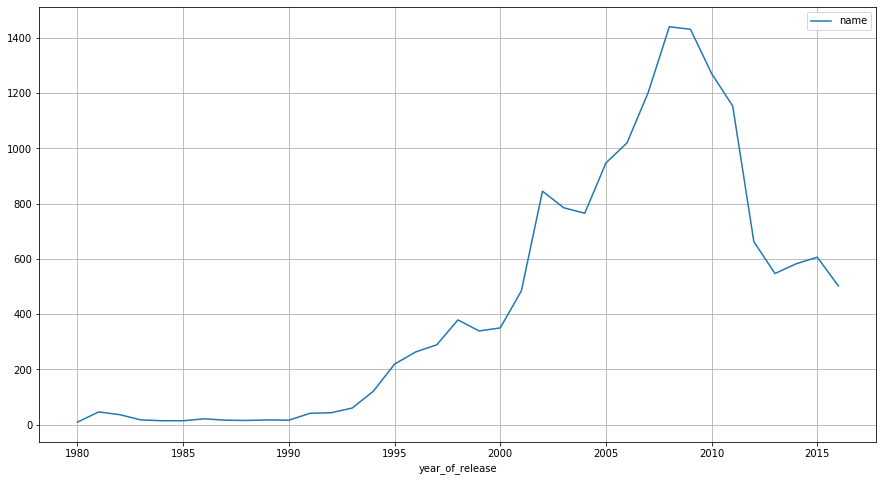

In [22]:
#Создам сводную таблицу для отображения количества релизов по годам
(df
    .pivot_table(index = 'year_of_release', values= 'name', aggfunc = 'count')
    .plot(grid = True, figsize = (15, 8))
)

Здесь прекрасно виден рост количества релизов с 1992 года и сильный скачок с 2000-го. Но для меня оказалось странным сильное падение с 2009 и я не могу понять, чем это могло быть обусловлено. 

Если смотреть только по этому графику, то здесь актуальный период можно взять с 2012 года, так как начиная с него и до актуального времени, каоличесвто релизов в год не сильно менялось.

Очевидно, спад вызван мировым кризисом в 2008, а потом мобильная индустрия захватила часть рынка. Играть на смартфонах можно где угодно, и не нужно покупать приставку.

,total_sales
platform,
PS2,1054.88
X360,881.27
Wii,824.54
PS3,800.09
DS,745.12


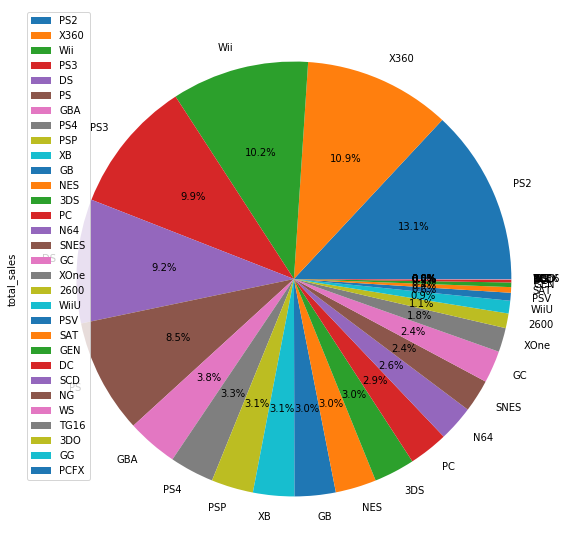

In [23]:
#Создам сводную таблицу для определения выручки каждой платформы за все время
platform_to_pie = (df
    .pivot_table(index = 'platform', values= 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales', ascending = False))
platform_to_pie.plot(y='total_sales', kind = 'pie', figsize = (10,10),autopct='%1.1f%%')
platform_to_pie.head(5)

По выведенным данным легко определить платформы с наибольшими продажами. Возьму первые 6 платформ, так как у них сильный отрыв от остальных платформ.

In [24]:
#Создам список 6 платформ с самыми крупными продажами
top6 = df.pivot_table(index = 'platform', values= 'total_sales', aggfunc = 'sum').nlargest(6,'total_sales').index.tolist()
#По этому списку создам новый срез, также учту период, начавшийся с 1992 года
top6_sales_platform = df.query('year_of_release > 1992 and platform in @top6')

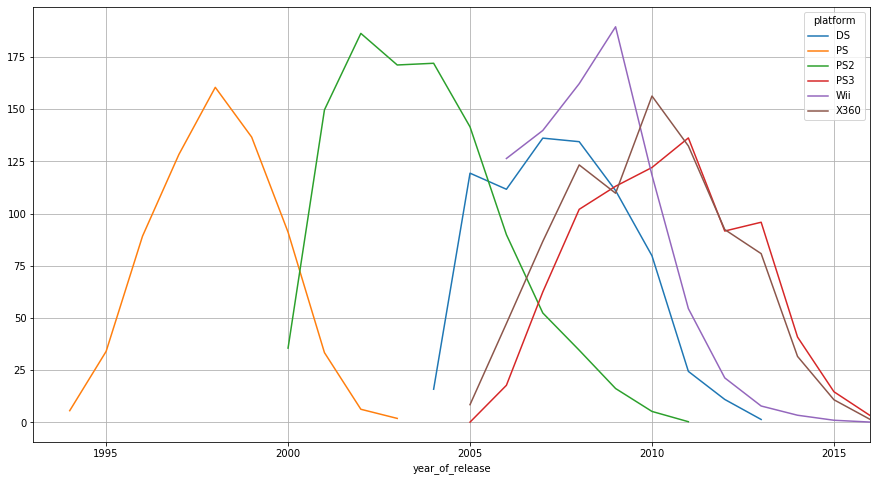

In [25]:
#Создам сводную таблицу для продаж на крупнейших платформах для того, чтобы вывести график
(top6_sales_platform
     .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
     .plot(grid = True, figsize = (15,8), xlim = (1993, 2016)))

По выведенному графику видно, что среднее время жизни одной платформы около 10 лет. И их графики напоминают нормальное распределение, то есть пик популярности какой-либо платформы наступает через 4-5 лет после релиза консоли.

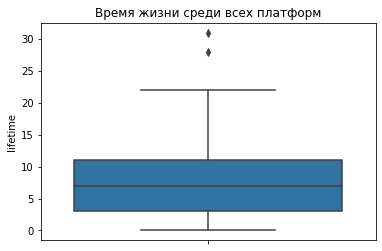

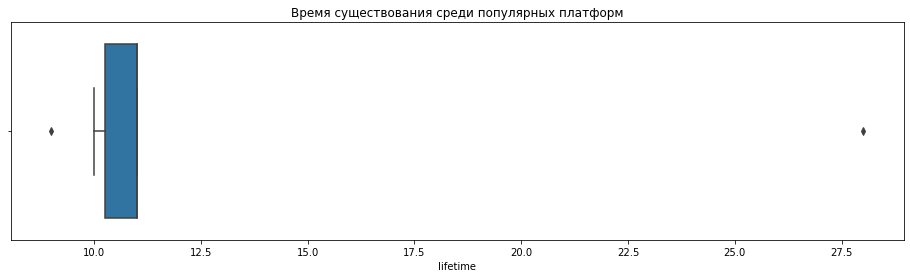

Среднее время существования популярной платформы: 13.33 лет
   platform  total_sales  lifetime
4        DS       745.12        28
28     X360       881.27        11
17      PS3       800.09        11
16      PS2      1054.88        11
26      Wii       824.54        10


,platform,total_sales,lifetime
13,PC,236.56,31
4,DS,745.12,28
0,2600,88.14,22
5,GB,246.27,13
28,X360,881.27,11
19,PSP,252.15,11
17,PS3,800.09,11
16,PS2,1054.88,11
11,NES,245.74,11
3,DC,15.68,10


In [26]:
#Посмотрю, что смогу сделать
def lifetime(platform):
    '''
    Подсчёт времени жизни платформы
    '''
    time_of_birth = df[df['platform'] == platform]['year_of_release'].min()
    time_of_death = df[df['platform'] == platform]['year_of_release'].max()
    lifetime = time_of_death - time_of_birth
    return lifetime

total_sales_and_lifetimes = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()
total_sales_and_lifetimes['lifetime'] = total_sales_and_lifetimes['platform'].apply(lifetime)
total_sales_and_lifetimes = total_sales_and_lifetimes.sort_values(by='lifetime', ascending = False)
#total_sales_and_lifetimes.boxplot(column = 'lifetime')
sns.boxplot(y='lifetime', data = total_sales_and_lifetimes)
plt.title('Время жизни среди всех платформ')
plt.show()
total_sales_and_lifetimes_slice = (total_sales_and_lifetimes
                                   .query('platform in @top6')
                                   .sort_values(by='lifetime', ascending = False))
#total_sales_and_lifetimes_slice.boxplot(column = 'lifetime',figsize = (5,8))
plt.figure(figsize=(16, 4))
sns.boxplot(x='lifetime', data = total_sales_and_lifetimes_slice)
plt.title('Время существования среди популярных платформ')
plt.show()
print('Среднее время существования популярной платформы: {:.2f} лет'.format(total_sales_and_lifetimes_slice['lifetime'].mean()))
print(total_sales_and_lifetimes_slice.head())
total_sales_and_lifetimes

Среднее время жизни по всем платформам около 7 лет. 

Среди популярных платформ посчитанное среднее время составляет больше 13 лет. Но реальная длительность существования едва превышает 10 лет. Так как среди популярных платформ есть платформа DS, которая существует уже почти 30 лет и поднимает среднее вверх.

Кстати о выбросах. К долгожителям относятся платформы DS, PC и Atari 2600. Также есть платформы просуществовавшие год и менее

Теперь же ознакомимся с данными за актуальный период. Как я определил ранее, это период с 2012 года. Для начала создамим срез

In [27]:
actual_df = df.query('year_of_release >= 2012')
actual_df['platform'].value_counts()

PS3     494
PSV     411
3DS     397
PS4     392
X360    294
PC      255
XOne    247
PSP     175
WiiU    147
Wii      55
DS       32
Name: platform, dtype: int64

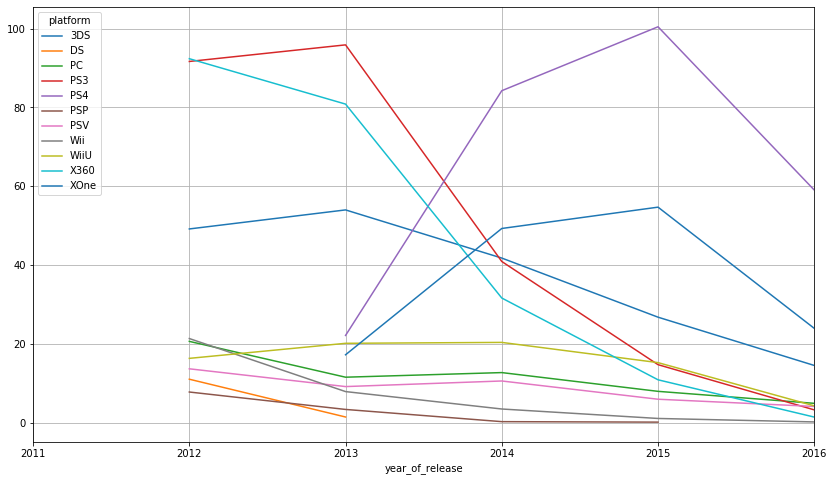

In [28]:
#Аналогично
(actual_df
     .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
     .plot(grid = True, figsize = (14,8), xlim = (2011, 2016)))

График показывает продажи всех платформ с 2012 года. 


Из него видно, что в 2016 году продажи ниже, чем в 2015. Скорее всего, данные собирались в середине 2016 года и фактически этот год ещё не закончился, следовательно, продажи ещё идут. Так что реальную картину за 2016 год можно будет увидеть только в начале 2017го.

Поэтому, лидеров с ростом продаж следует определять по продажам до 2015 года включительно. Таковыми являются 2 консоли: PS4 и XBox One. Продажи остальных платформ падают. Эти выводы подтверждают реальные данные. В 2013 году состоялся релиз нового поколения консолей. Разработчики игр стали делать игры под новые тех. характеристики. Поэтому лидеры прошлых лет XBox360 и PS3 стали устаревать и их продажи резко упали.

Также выделяется платформа 3DS, но я не стал её относить к лидирующим платформам, так как она пользовалась бешенной популярностью только у себя на родине(Японии), за пределами которой подобного не наблюдалось

Далее посмотрим глобальные продажи каждой игры с разбивкой по платформам

Text(0, 0.5, 'Платформа')

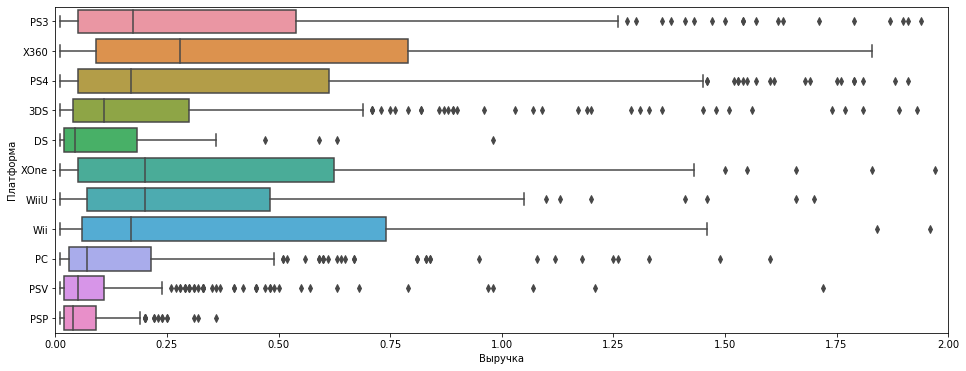

In [29]:
plt.figure(figsize=(16, 6))
sns.boxplot(y = 'platform', x = 'total_sales', data = actual_df).set_xlim(0,2)
plt.xlabel('Выручка')
plt.ylabel('Платформа')

По продажам всегда выделяются консоли PlayStation, XBox и Nintendo Wii вне зависимости от поколения. Эти платформы значительно обгоняют своих конкурентов. 

Самой успешной платформой является XBox360 с небольшим отрывом от остальных. 

Средняя выручка  игр успешных платформ колеблется в районе 0,2 млн. долларов. И здесь опять выделяется XBox360 со средней выручкой почти 0.3 млн. долларов.

Из прошлого пункта выделю самую успешную платформу XBox360.


Посмотрим, как на её продажи влияют отзывы пользователей и критиков

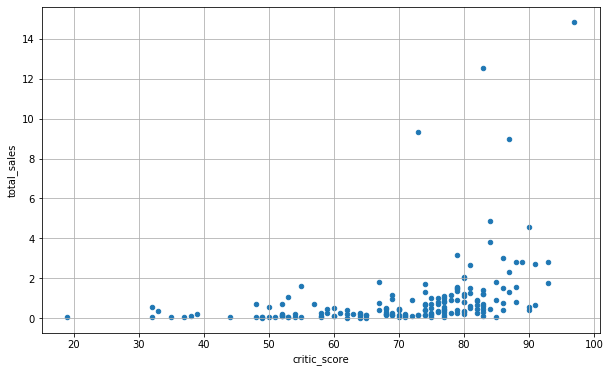

Коэффициент корреляции между продажами и отзывами критиков: 0.35994216975276827
Коэффициент корреляции между продажами и отзывами игроков: 0.006694593701771726


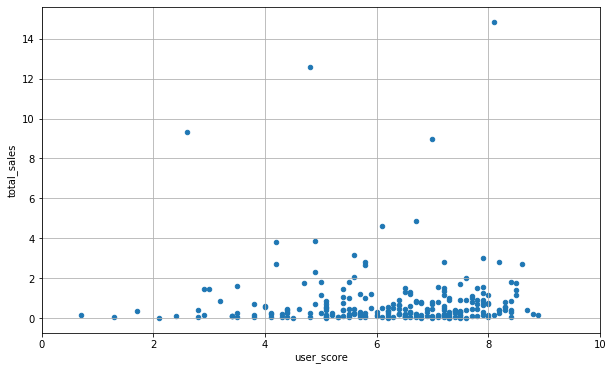

In [30]:
xbox360_slice = actual_df.query('platform == "X360"')
#Построю диаграмму рассеяния продаж и отзывов критиков и пользователей
xbox360_slice.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', figsize = (10,6), grid = True)
plt.show()
xbox360_slice.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', figsize = (10,6), grid = True, xlim = (0, 10))
#Посчитаем корреляцию между отзывами и продажами
print('Коэффициент корреляции между продажами и отзывами критиков:',
      xbox360_slice['total_sales'].corr(xbox360_slice['critic_score']))
print('Коэффициент корреляции между продажами и отзывами игроков:',
      xbox360_slice['total_sales'].corr(xbox360_slice['user_score']))

Если смотреть на коэффициенты корреляции, то сразу видно, что отзывы пользователей крайне мало влияют на продажи игры. Это логично, ведь как правило, оценка пользователей ставится после приобретения игры. Стоит учитывать, что вкусы игроков очень сильно различаются и никогда не получится угадать какие будут конечные продажи, ведь оценки ставятся простыми пользователями неадекватно. Из диаграммы рассеяния видно, что есть пару случаев, когда оценки пользователей крайне низкие, но продажи наоборот высокие.

Оценки критиков более показательны. Коэффициент корреляции говорит о том, что есть слабая связь с продажами. И, смотря на диаграмму, это соответствует действительности. Критики в большинстве своём ставят справедливые оценки игре, они знают, когда игра получилась хорошей. А если она хорошая, то скорее всего её продажи будут высокими.

Теперь проведем аналогичное исследование не внутри одной лишь XBox360, а наоборот по всем остальным платформам. Проверим, есть ли отличия в выводах

In [31]:
#Создам список остальных популярных платформ
actual_top5 = (actual_df
        .pivot_table(index = 'platform', values= 'total_sales', aggfunc = 'sum')
        .nlargest(5,'total_sales')
        .index.tolist())
#Выкину XBox360, так как диаграмма для неё уже построена 
actual_top5.remove('X360')
print(actual_top5)

['PS4', 'PS3', '3DS', 'XOne']


-------------------------------------------------------------------------------------------------
PS4


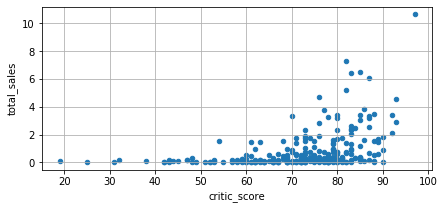

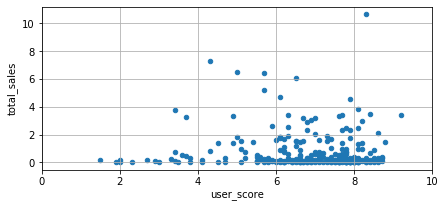

Коэффициент корреляции между продажами и отзывами критиков: 0.40588677465201267
Коэффициент корреляции между продажами и отзывами игроков: -0.03126053686666918
-------------------------------------------------------------------------------------------------
PS3


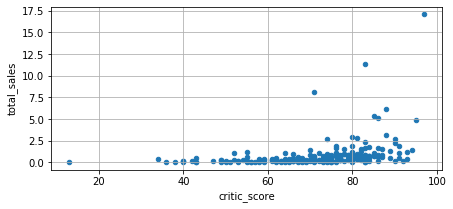

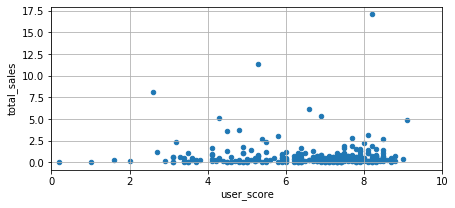

Коэффициент корреляции между продажами и отзывами критиков: 0.33430324344334034
Коэффициент корреляции между продажами и отзывами игроков: -0.005259005391191073
-------------------------------------------------------------------------------------------------
3DS


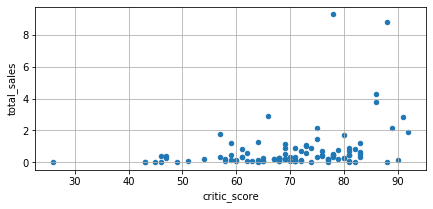

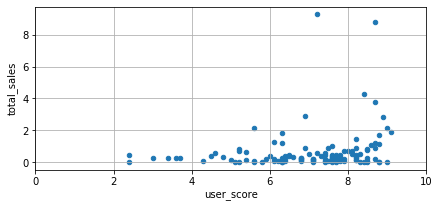

Коэффициент корреляции между продажами и отзывами критиков: 0.3204503558573278
Коэффициент корреляции между продажами и отзывами игроков: 0.19981812591875434
-------------------------------------------------------------------------------------------------
XOne


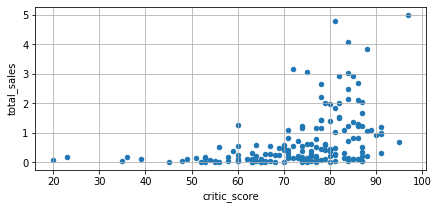

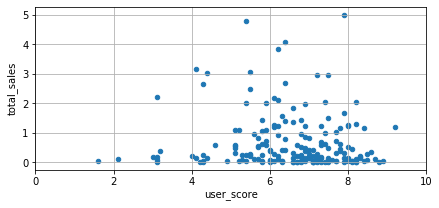

Коэффициент корреляции между продажами и отзывами критиков: 0.41720638309101765
Коэффициент корреляции между продажами и отзывами игроков: -0.06880394425598693


In [32]:
for platform in actual_top5:
    '''
    Цикл для автоматического построения диаграмм рассеяния
    '''
    print('-------------------------------------------------------------------------------------------------')
    print(platform)
    #Создание среза
    platform_slice = actual_df.query('platform == @platform')
    #Построение диграмм рассеяния по продажам и отзывам критиков
    platform_slice.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', figsize = (7,3), grid = True)
    plt.show()
    #Построение диграмм рассеяния по продажам и отзывам пользователей
    platform_slice.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', figsize = (7,3), grid = True, xlim = (0, 10))
    plt.show()
    #Посчитаем корреляцию между отзывами и продажами
    print('Коэффициент корреляции между продажами и отзывами критиков:',
        platform_slice['total_sales'].corr(platform_slice['critic_score']))
    print('Коэффициент корреляции между продажами и отзывами игроков:',
        platform_slice['total_sales'].corr(platform_slice['user_score']))

      В целом, выводы похожи. Слабая прямая связь между продажами и отзывами критиков, и практически отсутствующая связь с отзывами пользователей. 
      Стоит отметить, что на платформах нового поколения(PS4 и XBoxOne) продажи и отзывы критиков кореллируют больше всего. Правда, не могу понять почему только у них(разве только то, что Sony и Microsoft приглашают более компетентных критиков).
      Отзывы пользователей больше всего влияют(если можно так сказать) на платформе 3DS. Эта платформа в основном популярна в Японии и, видимо, японцы чаще отказываются от покупки игры с плохими отзывами. 

И наконец последний пункт этого шага.

Посмотрим на общее распределение игр по жанрам.

Для начала, посмотрим, какие жанры наиболее популярны, а какие наоборот. Воспользуемся круговой диаграммой

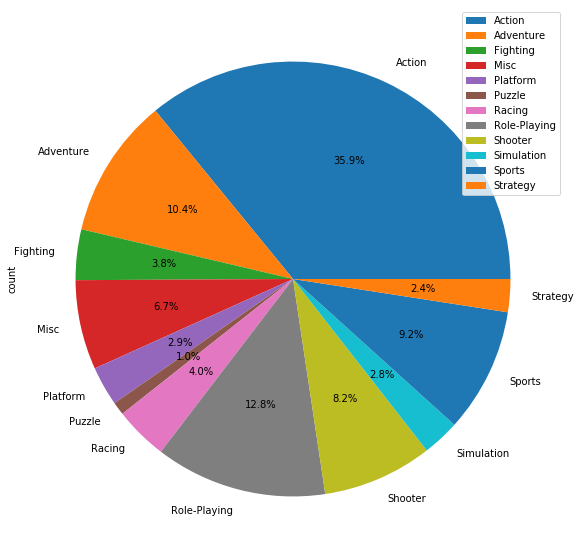

In [33]:
#Создам сводную таблицу для подсчета количества игр и суммарным продажам соответствующих жанру
actual_df_genres_grouped =(
    actual_df
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum', 'count'])
)
actual_df_genres_grouped.columns = ['sum','count']
#Построение круговой диагрммы по количеству игр в жанрах
actual_df_genres_grouped.plot(y='count', kind = 'pie', figsize = (10,10),autopct='%1.1f%%')
plt.show()

Из круговой диаграммы прекрасно видно, что самым популярным жанром является Action с гигантским отрывом. Второй "эшелон" популярности составляют жанры Adventure, RPG, Shooter и Sports. Самую малую часть рынка составляют игры головоломки(мои любимые Т.Т)

Далее ознакомимся конкретно с продажами соответствующих жанрам игр

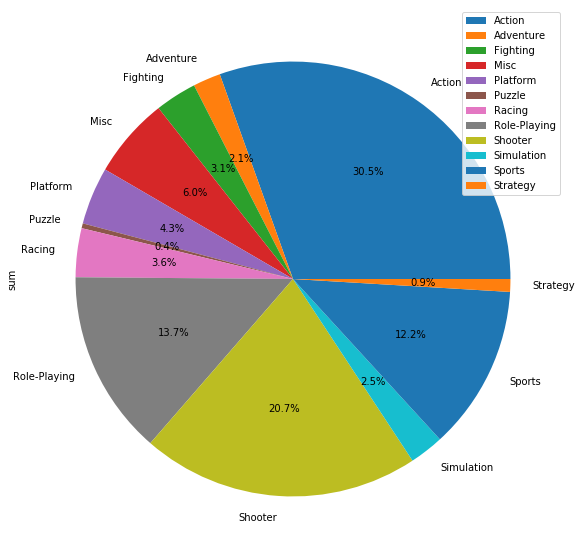

In [34]:
actual_df_genres_grouped.plot(y='sum', kind = 'pie', figsize = (10,10), autopct='%1.1f%%')

Как видим, диаграмма продаж похожа на диаграмму популярности. 

Самым прибыльным жанром является Action. К таковым можно также отнести жанры RPG, Shooter и Sports. Странно, что жанр Adventure при своей популярности не приносит столько же прибыли, как такие же популярные жанры второго "эшелона". Скорее всего, дело в микротранзакциях(внутриигровые покупки за реальные деньги), данный жанр плохо стимулирует пользователя вливать деньги в игру сверх покупки самой игры.

Самыми невыгодными жанрами являются Puzzle и Strategy

Глянем на цифры

In [35]:
actual_df_genres_grouped.sort_values(by='sum', ascending = False)

,sum,count
genre,,
Action,394.65,1041
Shooter,267.49,237
Role-Playing,177.97,370
Sports,158.63,268
Misc,77.61,193
Platform,55.42,85
Racing,47.01,115
Fighting,40.02,109
Simulation,32.93,80


    В данном пункте выявлено общее распределение игр по жанрам.
    Самыми прибыльными жанрами оказались Action, RPG, Shooter и Sports. Суммарно, их прибыль составляет более 75% всего игрового рынка.
    Жанры с высокими и низкими продажами ярко выделются на фоне остальных. Даже без коэффициента корреляции видно, что прибыльность жанра напрямую зависит от её популярности.

## Вывод

Были даны ответы на все вопросы обозначенные в начале данного шага. 

Был создан срез актуальных данных, по которому проводился анализ и по которому я буду проводить следующие шаги. В него вошли все игры выпущенные с 2012 года.

Была показана популярность различных платформ и жанров, распределения по ним игр, и продажи по ним.

## Шаг 4. Портрет пользователя каждого региона

В данном шаге определим для пользователя каждого региона(NA, EU, JP):
- Самые популярные платформы (топ-5). Определим различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу между регионами.

Также посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Начнём с платформ

-----Северная Америка -----
Топ 5 платформ в регионе
              sum
platform        
X360      140.57
PS4       108.74
PS3       103.74
XOne       93.12
3DS        55.49


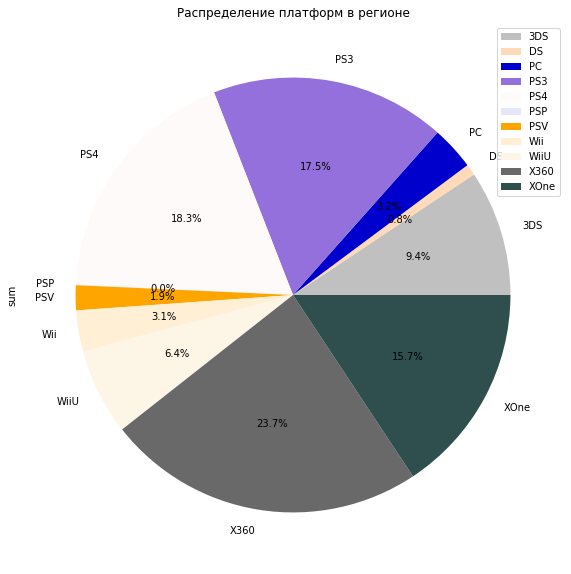

----------Европа-----------
Топ 5 платформ в регионе
              sum
platform        
PS4       141.09
PS3       107.27
X360       74.89
XOne       51.59
3DS        42.83


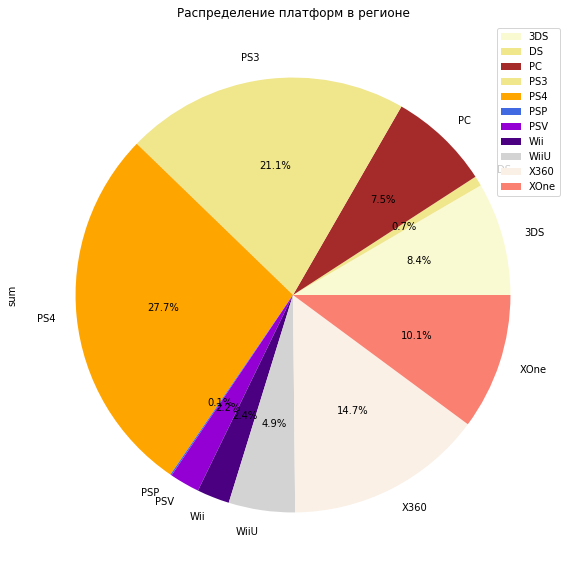

----------Япония-----------
Топ 5 платформ в регионе
             sum
platform       
3DS       87.79
PS3       35.29
PSV       21.04
PS4       15.96
WiiU      13.01


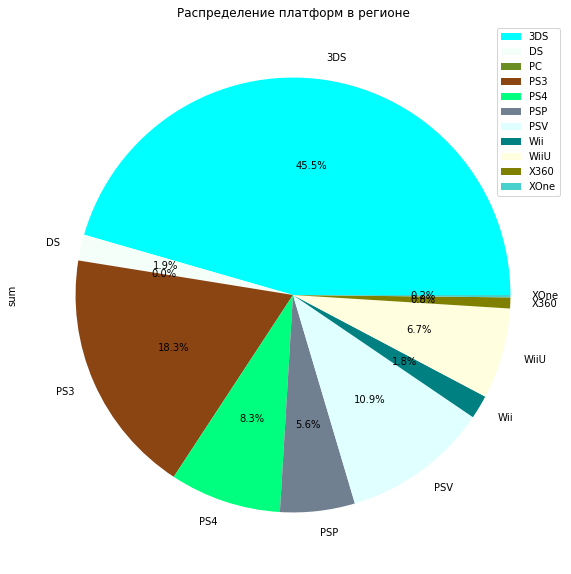

In [36]:
def popular_platforms(region_sales):
    '''
    Функция для построения круговой диаграммы по распределению платформ в регионе
    '''
    #Создание сводной таблицы по платформам
    region_actual_df = actual_df.pivot_table(index = 'platform', values = region_sales, aggfunc = 'sum')
    region_actual_df.columns = ['sum']
    #Построение круговой диаграммы по сводной таблице
    region_actual_df.plot(y = 'sum',
                          kind = 'pie', 
                          figsize = (10,10), 
                          autopct='%1.1f%%',
                          colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 11),
                          title = 'Распределение платформ в регионе')
    #Вывод топ 5 платформ в регионе по популярности
    top5_region_platforms = region_actual_df.nlargest(5,'sum')
    print('Топ 5 платформ в регионе\n',top5_region_platforms)
    plt.show()

print('-----Северная Америка -----')    
popular_platforms('na_sales')
print('----------Европа-----------') 
popular_platforms('eu_sales')
print('----------Япония-----------') 
popular_platforms('jp_sales')

Я вывел круговые диаграммы для визулизации популярности платформ в каждом регионе. Возникла проблема с ограничением количества различных цветов в диаграмме, для решения которой пришлось запариться.

Топ 5 платформ в Европе и в Северной Америке одинаковый. Отличие только  в том, что В Америке лидирует консоль XBox360, а в Европе PS4 и PS3.

В Японии же топ 5 платформ обсолютно другой. Почти половину всего рынка забирает консоль 3DS, обгоняя ближайшую консоль по продажам примерно в 2.5 раза.

Покажу нагляднее

In [37]:
sales_pivot = actual_df.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
sales_pivot = sales_pivot/sales_pivot.sum()
sales_pivot.sort_values(by='eu_sales', ascending = False).style.format('{:.1%}').bar(width = 70)

,eu_sales,jp_sales,na_sales
platform,,,
PS4,27.7%,8.3%,18.3%
PS3,21.1%,18.3%,17.5%
X360,14.7%,0.8%,23.7%
XOne,10.1%,0.2%,15.7%
3DS,8.4%,45.5%,9.4%
PC,7.5%,0.0%,3.2%
WiiU,4.9%,6.7%,6.4%
Wii,2.4%,1.8%,3.1%
PSV,2.2%,10.9%,1.9%


     Как видно,вкусы у японских польщователей совсем отличаются от пользователей из Америки и Европы. Японцы отдают свои предпочтения портативным консолям(3DS, WiiU, PSV, PSP),тем,что поместятся в кармане и которые можно поиграть в любом месте.
     Пользователи из Америки и Европы наоборот, предпочитают стандартные консоли, те, что требуют подключения к телевизору. 

Посмотрим на популярность жанров в регионах

-----Северная Америка -----
Топ 5 платформ в регионе
                  sum
genre               
Action        180.15
Shooter       144.79
Sports         81.53
Role-Playing   64.00
Misc           38.19


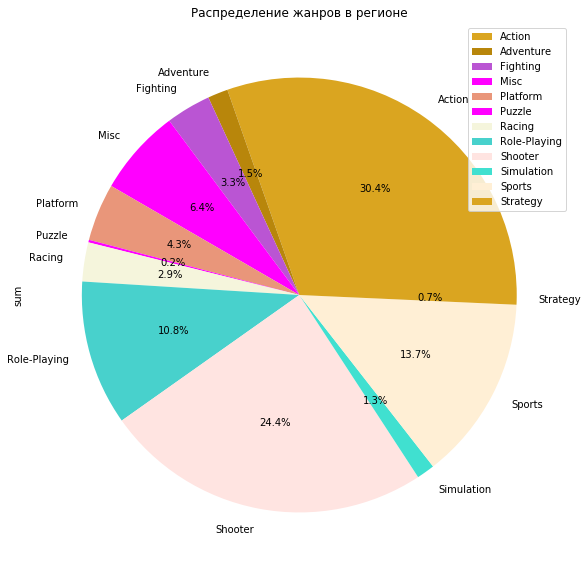

----------Европа-----------
Топ 5 платформ в регионе
                  sum
genre               
Action        161.70
Shooter       113.47
Sports         69.09
Role-Playing   48.53
Racing         27.29


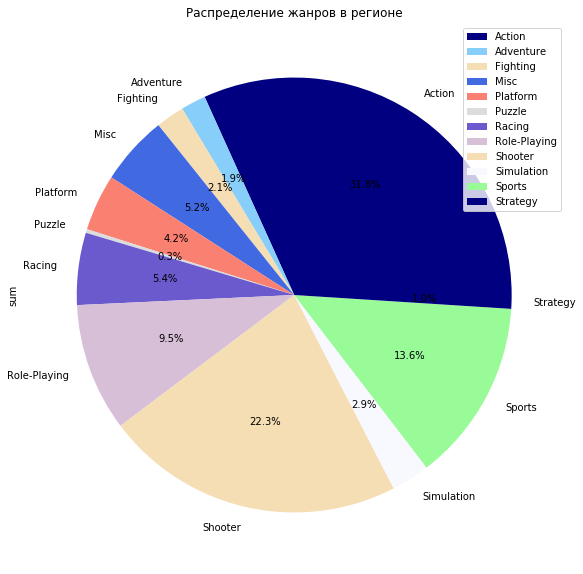

----------Япония-----------
Топ 5 платформ в регионе
                 sum
genre              
Role-Playing  65.44
Action        52.80
Misc          13.10
Simulation    10.41
Fighting       9.44


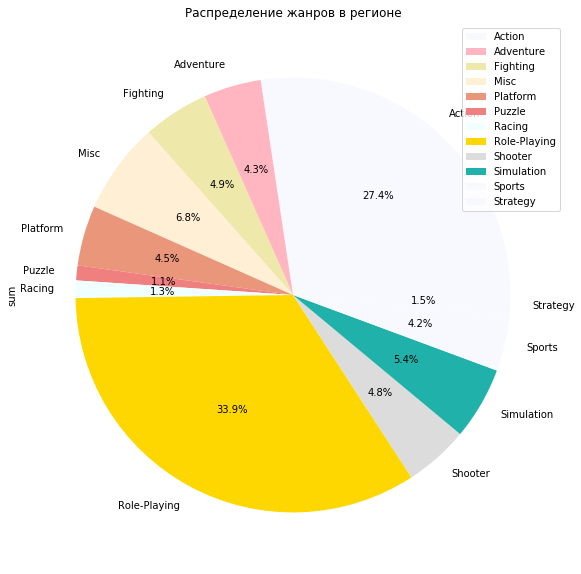

In [38]:
def popular_genres(region_sales):
    '''
    Функция для построения круговой диаграммы по распределению жанров в регионе
    '''
    #Создание сводной таблицы по жанрам
    region_actual_df = actual_df.pivot_table(index = 'genre', values = region_sales, aggfunc = 'sum')
    region_actual_df.columns = ['sum']
    #Построение круговой диаграммы по сводной таблице
    region_actual_df.plot(y = 'sum',
                          kind = 'pie', 
                          figsize = (10,10), 
                          autopct='%1.1f%%',
                          colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 11),
                          title = 'Распределение жанров в регионе')
    #Вывод топ 5 жанров в регионе по популярности
    top5_region_genres = region_actual_df.nlargest(5,'sum')
    print('Топ 5 платформ в регионе\n',top5_region_genres)
    plt.show()

print('-----Северная Америка -----')    
popular_genres('na_sales')
print('----------Европа-----------') 
popular_genres('eu_sales')
print('----------Япония-----------') 
popular_genres('jp_sales')

In [39]:
sales_pivot = actual_df.pivot_table(index = 'genre', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
sales_pivot = sales_pivot/sales_pivot.sum()
sales_pivot.sort_values(by='eu_sales', ascending = False).style.format('{:.1%}').bar(width = 70)

,eu_sales,jp_sales,na_sales
genre,,,
Action,31.8%,27.4%,30.4%
Shooter,22.3%,4.8%,24.4%
Sports,13.6%,4.2%,13.7%
Role-Playing,9.5%,33.9%,10.8%
Racing,5.4%,1.3%,2.9%
Misc,5.2%,6.8%,6.4%
Platform,4.2%,4.5%,4.3%
Simulation,2.9%,5.4%,1.3%
Fighting,2.1%,4.9%,3.3%


    Предпочтения по жанрам пользователей из Европы и Америки схожи, они практически одинаково любят жанры Action, Shooter, Sports и RPG. 
    Япони вновь отличилась. Самым популярным жанром оказался жанр РПГ. Насколько я знаю, в Японии ооочень популярны многопользовательские онлайн игры подавляющее большинство которых входят в этот жанр. Это объясняет такой перевес. Японцы также любят жанр Action, как и пользователи из Европы и Америки, но не разделяют их любовь к шутерам и спортивным играм.
    Однако, пользователи всех регионов одинаково мало покупают игры жанров Adventure, Strategy и Puzzle.

Посмотрим на влияние рейтинга ESRB на продажи в регионах

Поясню значения рейтинга для справки:
- **«M» («Mature») — «От 17 лет»**: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- **«E» («Everyone») — «Для всех»**: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
- **«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»**: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены.
- **«T» («Teen») — «Подросткам 13—19 лет»**: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

In [40]:
sales_pivot = actual_df.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
sales_pivot = sales_pivot/sales_pivot.sum()
sales_pivot.sort_values(by='eu_sales', ascending = False).style.format('{:.1%}').bar(width = 70)

,eu_sales,jp_sales,na_sales
rating,,,
M,46.6%,25.3%,47.3%
E,27.1%,33.8%,23.3%
E10+,13.7%,9.8%,15.9%
T,12.7%,31.1%,13.5%


    Видно, что рейтинг ESRB влияет на продажи.
    В Европе и Америке особенно популярны игры со взрослым контентом. В Японии же продажи этой категории уступают категориям «Для всех» и «Подросткам 13—19 лет». 
    Если основываться на этих критериях, то можно сделать вывод, что большинство пользователей из Европы и Америки имеют возраст старше 17 лет. В Японии же, выручка со школьников превышает выручку с взрослых пользователей.

## Вывод
На данном шаге выяснилось, что вкусы пользователей из Северной Америки и Европы в целом похожи. Они любят одни и те же платформы, предпочитают одинаковые жанры, любят игры для взрослых)

Но Япония... Видимо, её жители прибыли из другой планеты, так как её вкусы скажем так... весьма специфичны. Кхах. Но это все шутки. Японские пользователи отличились особой любовью к РПГ и портативным консолям.

# Шаг 5. Проверим гипотезы

In [41]:
#Импортирую модуль scipy для использования ttest'а
from scipy import stats as st

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую гипотезу по следующему смыслу: **"Разницы нет, иследуемые параметры равны"**. В нашем случае нулевая гипотеза будет звучать так:
- **Средние пользовательские рейтинги платформ Xbox One и PC _одинаковые_**


Соответственно, альтернативная гипотеза:
- **Средние пользовательские рейтинги платформ Xbox One и PC _различаются_**


Наша альтернативная гипотеза является двусторонней, так как рейтинги могут оказаться как выше, так и ниже. Ползовательские рейтинги на разных платформах являются **генеральными совокупностями**, поэтому чтобы проверить гипотезу о равенстве двух генеральных совокупностей применим специальный метод.

Осуществляем проверку гипотез **с помощью ttest_ind**. Уровень статической значимости возьмём 5%

In [42]:
#Найдём значения дисперсий наших выборок
print(actual_df[actual_df['platform'] == 'XOne']['user_score'].var())
print(actual_df[actual_df['platform'] == 'PC']['user_score'].var())

1.9069968429360702
2.7471582035657867


Значения дисперсий из наших выборок значительно разнятся. Это следует учесть в t-teste: Следует указать параметр equal_var равным False , так как наши дисперсии не равны

In [43]:
alpha = .05

result = st.ttest_ind(
    actual_df[actual_df['platform'] == 'XOne']['user_score'].dropna().tolist(),
    actual_df[actual_df['platform'] == 'PC']['user_score'].dropna().tolist(),
    equal_var = False
)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 0.6206366351489678
Не отвергаем нулевую гипотезу


Посмотрим на средние оценки

In [44]:
print('XBox:',actual_df[actual_df['platform'] == 'XOne']['user_score'].mean())
print('PC:',actual_df[actual_df['platform'] == 'PC']['user_score'].mean())

XBox: 6.52142857142857
PC: 6.44549763033175


Средняя оценка на PC меньше XBox на 0,08. Разница небольшая, чуть больше 1 процента. То есть весьма уверенно можно сказать, что оценки пользователей этих двух платформ равны.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

По аналогии с первой гипотезой сформулируем нашу нулевую гипотезу так:
- **Средние пользовательские рейтинги жанров Action и Sports _не отличаются_**


Альтернативная же гипотеза:
- **Средние пользовательские рейтинги жанров Action и Sports _различны_**


И делаем все аналогично первой гипотезе.

Сначала проверим значения дисперсий этих соовокупностей

In [45]:
print(actual_df[actual_df['genre'] == 'Action']['user_score'].var())
print(actual_df[actual_df['genre'] == 'Sports']['user_score'].var())

1.881917350673345
3.022890298704733


Дисперсии выборок принимаем неравными

In [46]:
alpha = .05

result = st.ttest_ind(
    actual_df[actual_df['genre'] == 'Action']['user_score'].dropna().tolist(),
    actual_df[actual_df['genre'] == 'Sports']['user_score'].dropna().tolist(),
    equal_var = False
)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 2.337200239591976e-20
Отвергаем нулевую гипотезу


Средние оценки жанров

In [47]:
print('Action:',actual_df[actual_df['genre'] == 'Action']['user_score'].mean())
print('Sports:',actual_df[actual_df['genre'] == 'Sports']['user_score'].mean())

Action: 6.83427495291903
Sports: 5.455897435897437


In [48]:
actual_df[actual_df['genre'] == 'Action']['user_score'].dropna()

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 531, dtype: float64

Средние ползовательские рейтинги жанров Action и Sports явно различаются. Это показал ttest и это можно увидеть по среднему рейтингу.

## Вывод

С помощью t-test'а и сравнения средних мы подтвердили обе наши гипотезы:
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
- **Средние пользовательские рейтинги жанров Action и Sports разные**

# Общий вывод

Целью данного проекта было выявление определяющих успешность игры закономерностей.

Проект состоял из следующих этапов:
- Ознакомление с данными
- Предобработка и подготовка данных для анализа
- Исследовательский анализ данных
- Составление портрета пользователя региона
- Проверка гипотез

<br>

**На первом этапе** была загружена необходимая для работы таблица, проведен первичный анализ присутствующих проблем в данных. В результате были выявлены следующие проблемы:
- В столбцах Name, Genre, Year_of_Release, Critic_Score, User_Score и Rating были обнаружены пропущеные значения
- Столбцы с годом выпуска имели тип данных float
- Столбцы с оценкой пользователей имели тип данных object из-за присутствующих в некоторых строках значений 'tbd'

<br>

**На втором этапе** были исправлена часть проблем, обнаруженные на первом этапе. Не удалось лишь обработать пропуски в столбцах Critic_Score, User_Score и Rating.

Также были посчитаны суммарные продажи во всех регионах и записаны в столбец total_sales

<br>

**На третьем этапе** был проведен исследовательский анализ данных в рамках которого были проведены следующие действия:
- Выведен график распределения количества выпущенных игр по годам
- Выведен график продаж самых успешных игр за все время
- Определен актуальный период, в рамках которого проводился последующий анализ
- Определены потенциально прибыльные платформы
- Построен график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам
- Рассмотрено влияние на продажи  внутри одной популярной платформы отзывы пользователей и критиков. Далее сравнивалось с продажами на других популярных платформах
- Рассмотрено общее распределение игр по жанрам.

Кратко подведу результаты:
- Бум продаж игр начался в 1992 году.
- Актуальный период это период с 2012 года до наших дней
- Самая успешная платформа за все время - PS2
- Среднее время жизни платформы составляет около 10 лет. Пик продаж игр на неё наступает через 4-5 лет после релиза консоли
- За актуальный период выделюятся продажи консолей XBox, PlayStation и Nintendo Wii
- Высокие оценки критиков благотворно влияют на продажи игр, оценки пользователей практически не воздействуют на них, не считая консоли 3DS
- Самый популярный жанр игр в мире - Action, самый непопулярный - Puzzle

<br>

**На четвертом этапе** составлен портрет пользователя каждого региона. Оказалось, что вкусы пользователей из _Северной Америки_ и _Европы_ схожи:
- Они почти одинаково любят жанры Action, Shooter, Sports и RPG
- Их любимыми консолями являются консоли от Sony и Microsoft
- Предпочитают игры со взрослым контентом

Жители _Японии_ имеют другие вкусы:
- Обожают жанр RPG, хорошо относятся к Action, но весьма прохладно к Shooter и Sports
- Признают только отечественные консоли. Портативные консоли занимают около 70% рынка
- Популярны игры предназначенные для школьников

<br>

**На пятом этапе** были выдвинуты и проверены следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

Проверка гипотез не отвергнула ни одну из них. 

Средние пользовательские рейтинги платформ Xbox One и PC отличались на 5%. Недостаточно, чтобы сказать, что они разные.

Средние пользовательские рейтинги жанров Action и Sports сильно различались друг от друга.

<br>

### По итогу работы можно сказать, что были выявлены все закономерности, влияющие на успешность игры